In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**SELECTING THE TRAIN AND TEST DATA SETS WHICH ARE UPLOADED ON GOOGLE DRIVE**

In [ ]:
train = pd.read_csv("/content/gdrive/MyDrive/data disease/Training.csv")
test = pd.read_csv("/content/gdrive/MyDrive/data disease/Testing.csv")

In [ ]:
print("Size of train data set :",train.shape)
print("Size of test data set :",test.shape)

Size of train data set : (4920, 133)
Size of test data set : (41, 133)


**COMBINING BOTH TRAIN AND TEST DATA**

In [ ]:
df = pd.concat([train, test])

In [ ]:
print("Size of the combined data :",df.shape)

Size of the combined data : (4961, 133)


In [ ]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

**DATA PRE PROCESSING**

CHECKING FOR ANY NULL VALUES

In [ ]:
df.isnull().sum().value_counts()

0    133
dtype: int64

REPLACING FOR NULL VALUES WITH 0

In [ ]:
df.fillna(0)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
37,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
39,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


CHECKING WHETHER THE DATASET IS IN BALANCED FORM OR NOT USING BARPLOT

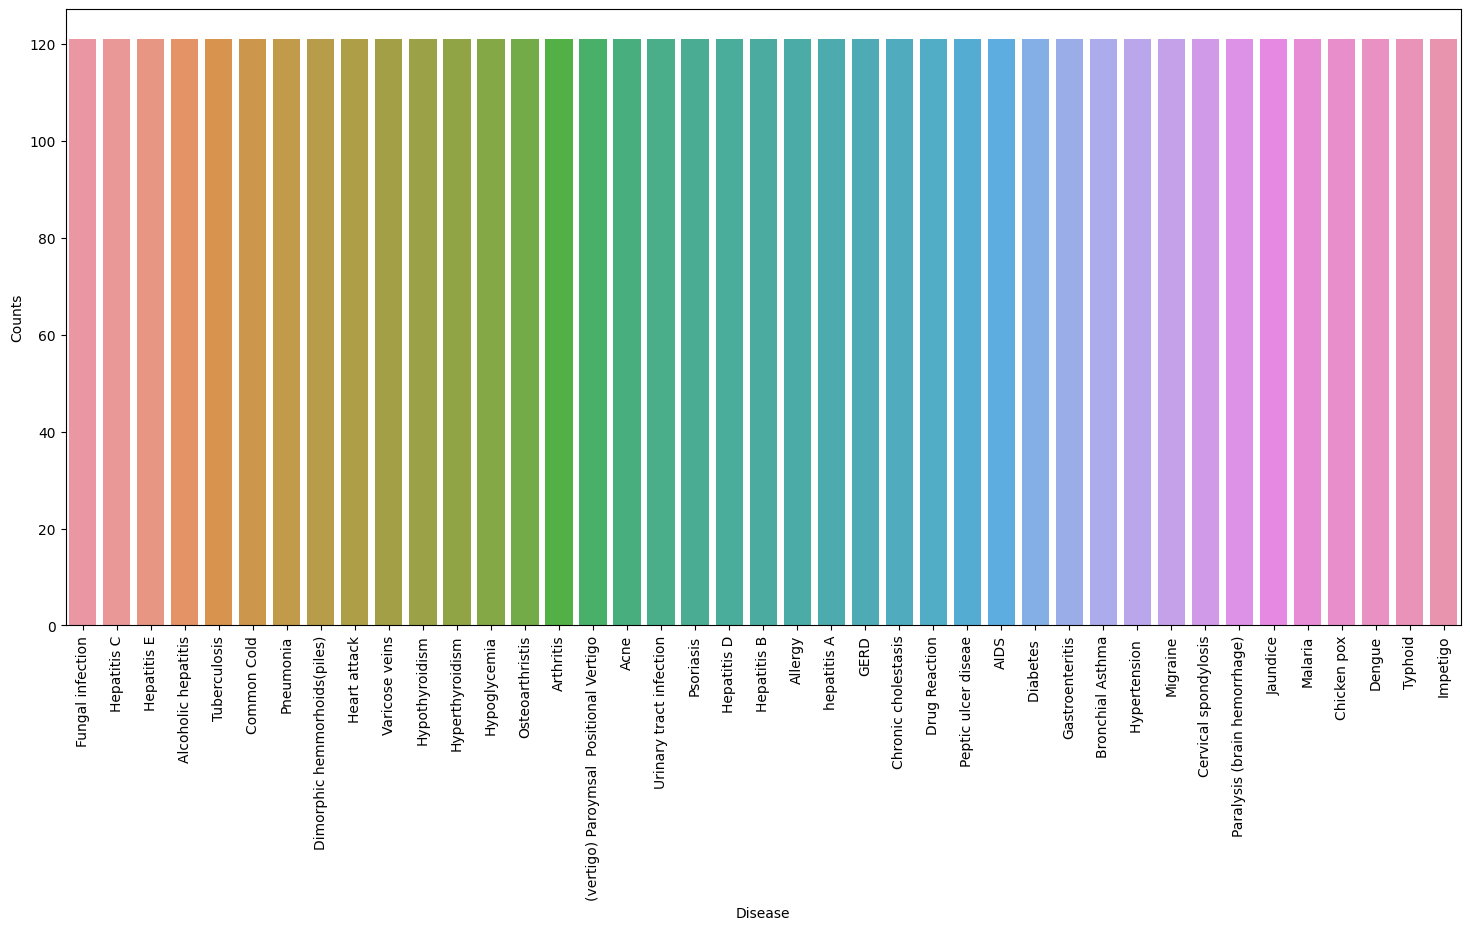

In [ ]:
disease_counts = df["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['prognosis']

0                            Fungal infection
1                            Fungal infection
2                            Fungal infection
3                            Fungal infection
4                            Fungal infection
                       ...                   
36    (vertigo) Paroymsal  Positional Vertigo
37                                       Acne
38                    Urinary tract infection
39                                  Psoriasis
40                                   Impetigo
Name: prognosis, Length: 4961, dtype: object

THE COLUMN VALUES OF PROGNOSIS IS GIVEN AS CATEGORICAL VALUES SO WE CAN ENCODE THEM USING LABEL ENCODER

In [ ]:
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])

AFTER ENCODING, THE DATASET IS TRANFORMED AS

In [ ]:
df['prognosis']

0     15
1     15
2     15
3     15
4     15
      ..
36     0
37     2
38    38
39    35
40    27
Name: prognosis, Length: 4961, dtype: int64

In [ ]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
count,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,...,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000
mean,0.137875,0.159847,0.021971,0.045152,0.021971,0.162266,0.139085,0.045152,0.045152,0.021971,...,0.021971,0.021971,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181,20.000000
std,0.344804,0.366501,0.146605,0.207659,0.146605,0.368732,0.346070,0.207659,0.207659,0.146605,...,0.146605,0.146605,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493,11.833352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000


**SELECTING THE FEATURE VARIABLES AND A TARGET VARIABLE**

:IN THE DATA SET, WE HAVE NEARLY 132 DIFFERENT VARITIES OF SYMPTOMS, SO I HAVE CHOSEN ALL THOSE **SYMPTOMS** AS MY **FEATURE VARIABLES** AND THE **PROGNOSIS** COLUMN AS MY **TARGET VARIABLE**

In [ ]:
X=df.drop(['prognosis'],axis=1)
y=df['prognosis']
print(X.shape)
print(y.shape)
#Splitting the dataset into training set and test set with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

(4961, 132)
(4961,)


In [ ]:
# Accuaracy score for SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)
print("Accuracy for SVC:",metrics.accuracy_score(y_test,preds)*100)

# Accuaracy score for Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print("Accuracy for Naive Bayes:",metrics.accuracy_score(y_test,preds)*100)

# Accuaracy score for Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=7,criterion='gini',random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print("Accuracy for Random forest:",metrics.accuracy_score(y_test,preds)*100)

# Accuaracy score for Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy for Decision Tree:",metrics.accuracy_score(y_test,preds)*100)

Accuracy for SVC: 100.0
Accuracy for Naive Bayes: 100.0
Accuracy for Random forest: 100.0
Accuracy for Decision Tree: 100.0


**CORRELATION MATRIX**

In [ ]:
df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


**SINCE THE DATA IS GETTING OVER-FITTED ON EACH CLASSIFICATION, WE NEED TO SELECT ALGORITHMS WHICH CAN REDUCE THE OVER-FITTING PART**

1) While splitting more number of trees, using decision tree model. The model  often tends to overfit the data once again, so we can reject the decision tree classification.

2) Since the features are relative, ie. a symptom can cause an another symptom, we can reject Naive bayes model, because the input features in the Naive bayes are needed to be independent for better results of the model.

In [ ]:
#feature importance for random forest
feature_imp = pd.Series(rf_model.feature_importances_,index=list(df.columns[:-1])).sort_values(ascending=False).head(50)
feature_imp[::-1]

breathlessness               0.008689
nausea                       0.008745
loss_of_appetite             0.008924
cramps                       0.008945
polyuria                     0.009458
neck_pain                    0.009513
increased_appetite           0.009838
stiff_neck                   0.009999
spinning_movements           0.010091
sunken_eyes                  0.010170
skin_rash                    0.010193
abnormal_menstruation        0.010313
altered_sensorium            0.010440
watering_from_eyes           0.010722
dischromic _patches          0.010950
chills                       0.011126
small_dents_in_nails         0.011225
belly_pain                   0.011755
spotting_ urination          0.012132
unsteadiness                 0.012231
mucoid_sputum                0.012395
scurring                     0.012693
stomach_pain                 0.012735
weakness_of_one_body_side    0.012912
painful_walking              0.012933
muscle_weakness              0.013105
vomiting    

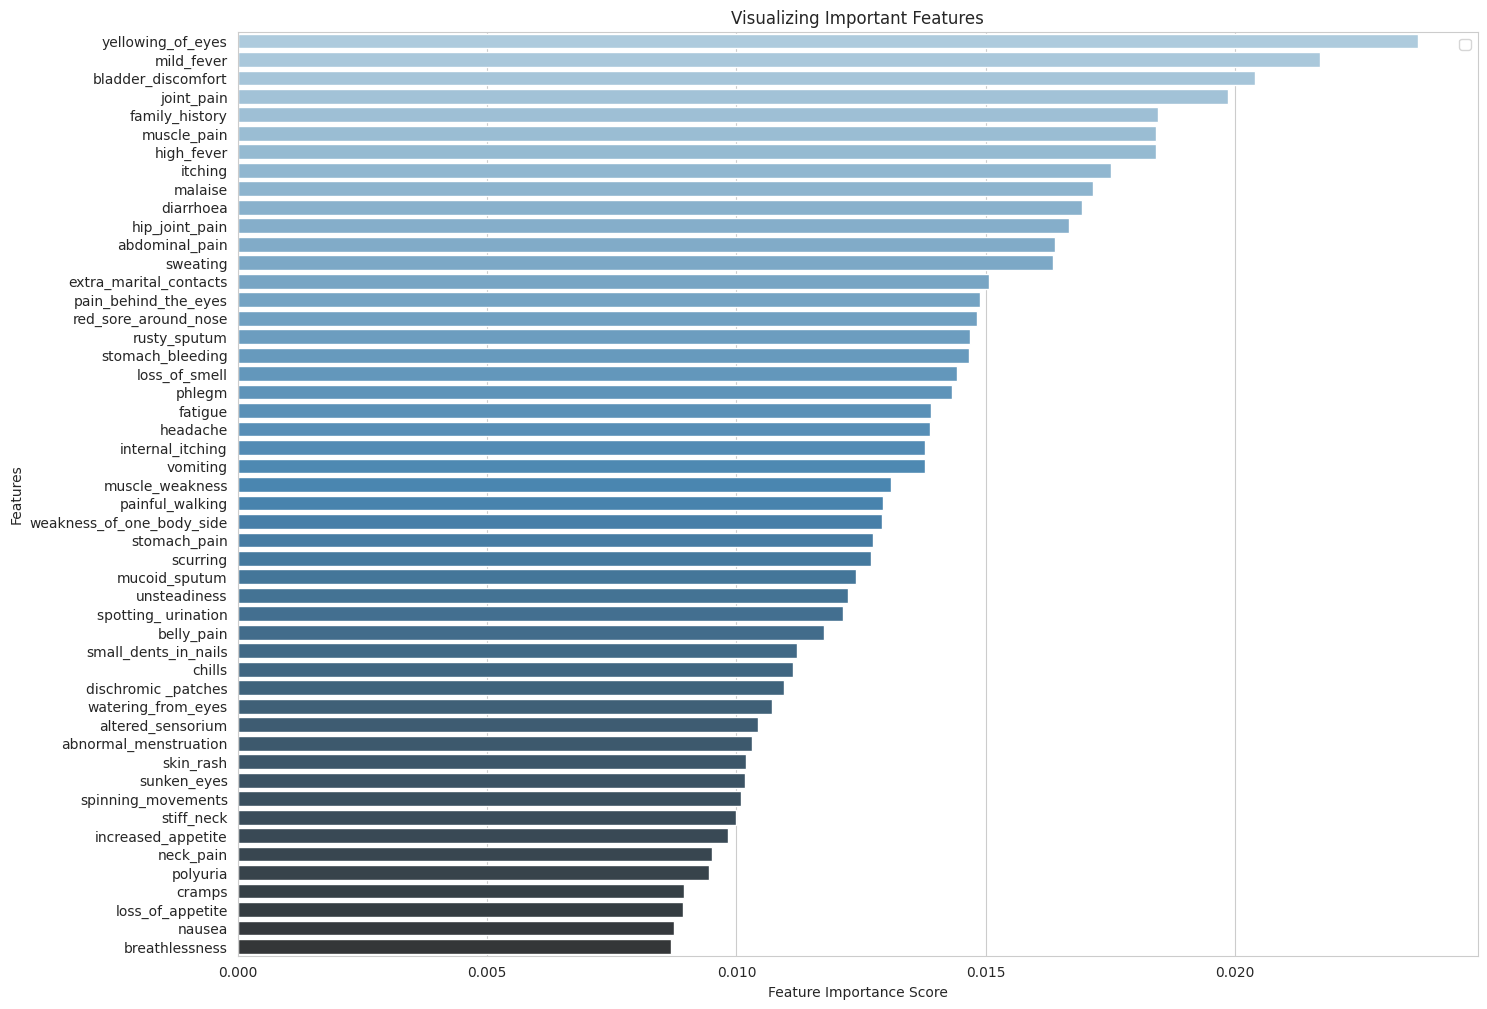

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 12)

# Creating a bar plot
sns.set_style("whitegrid")
sns.barplot(x=feature_imp, y=feature_imp.index, palette='Blues_d',color='white')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
X_reduced, y = df[['receiving_blood_transfusion', 'red_sore_around_nose',
       'abnormal_menstruation', 'continuous_sneezing', 'breathlessness',
       'blackheads', 'shivering', 'dizziness', 'back_pain', 'unsteadiness',
       'yellow_crust_ooze', 'muscle_weakness', 'loss_of_balance', 'chills',
       'ulcers_on_tongue', 'stomach_bleeding', 'lack_of_concentration', 'coma',
       'neck_pain', 'weakness_of_one_body_side', 'diarrhoea',
       'receiving_unsterile_injections', 'headache', 'family_history',
       'fast_heart_rate', 'pain_behind_the_eyes', 'sweating', 'mucoid_sputum',
       'spotting_ urination', 'sunken_eyes', 'dischromic _patches', 'nausea',
       'dehydration', 'loss_of_appetite', 'abdominal_pain', 'stomach_pain',
       'yellowish_skin', 'altered_sensorium', 'chest_pain', 'muscle_wasting',
       'vomiting', 'mild_fever', 'high_fever', 'red_spots_over_body',
       'dark_urine', 'itching', 'yellowing_of_eyes', 'fatigue', 'joint_pain',
       'muscle_pain']], df.iloc[:,-1]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2)

In [ ]:
#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 93.95770392749245


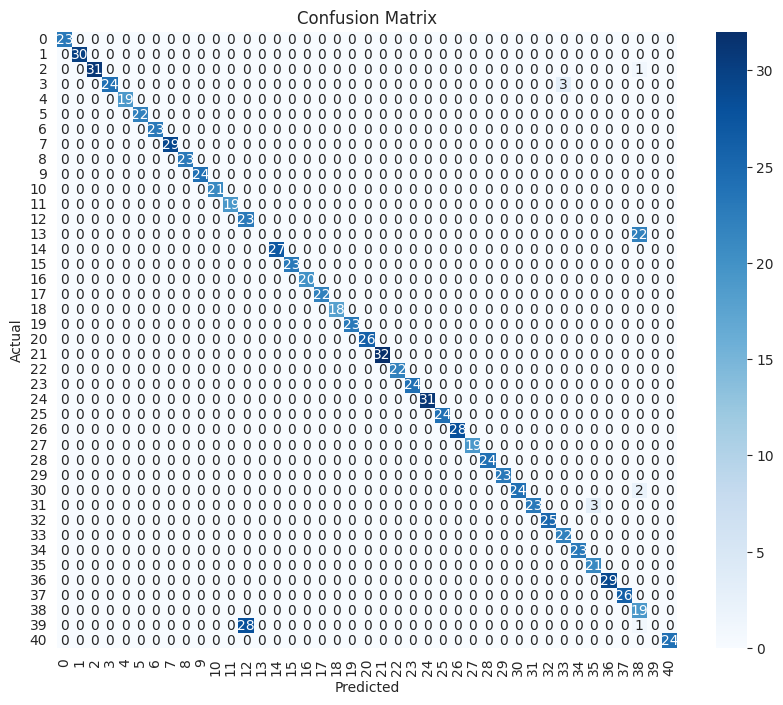

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np
import pandas as pd

class Randomforestclassifier:
    def __init__(self, num_trees=100, max_features=None, max_depth=None):
        self.num_trees = num_trees
        self.max_features = max_features
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        X = np.array(X)  # Convert X to a NumPy array
        y=np.array(y)
        num_samples = len(X)
        num_features = len(X[0])
        self.trees = []

        for _ in range(self.num_trees):
            # Randomly select a subset of features
            if self.max_features:
                selected_features = np.random.choice(num_features, self.max_features, replace=False)
                X_subset = X[:, selected_features]
            else:
                X_subset = X

            # Randomly select a subset of samples (bootstrap aggregating)
            indices = np.random.choice(num_samples, num_samples, replace=True)
            X_bootstrap = X_subset[indices]
            y_bootstrap = y[indices]

            # Create a decision tree using the bootstrap samples
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)


    def predict(self, X):
        X = np.array(X)  # Convert X to a NumPy array
        predictions = []

        for tree in self.trees:
            predictions.append(tree.predict(X))

        # Voting for the majority class
        predictions = np.array(predictions)
        predictions=np.round(np.mean(predictions, axis=0))
        return predictions


class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        X = np.array(X)  # Convert X to a NumPy array
        self.tree = self.build_tree(X, y)

    def predict(self, X):
        X = np.array(X)  # Convert X to a NumPy array
        predictions = [self.predict_sample(x, self.tree) for x in X]
        return predictions

    def predict_sample(self, sample, node):
        if 'class' in node:
            return node['class']

        feature_value = sample[node['feature']]

        if feature_value <= node['value']:
            return self.predict_sample(sample, node['left'])
        else:
            return self.predict_sample(sample, node['right'])

    def build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        # Base cases: if all samples have the same class or maximum depth is reached
        if len(np.unique(y)) == 1 or (self.max_depth and depth == self.max_depth):
            return {'class': y[0]}

        # Find the best split point
        best_feature, best_value = self.find_best_split(X, y)

        # Handle the case where best_feature or best_value is None
        if best_feature is None or best_value is None:
            return {'class': np.argmax(np.bincount(y))}

        # Recursive splitting
        left_indices = np.where(X[:, best_feature] <= best_value)[0]
        right_indices = np.where(X[:, best_feature] > best_value)[0]

        left_tree = self.build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self.build_tree(X[right_indices], y[right_indices], depth + 1)

        return {'feature': best_feature, 'value': best_value, 'left': left_tree, 'right': right_tree}


    def find_best_split(self, X, y):
        best_gain = 0
        best_feature = None
        best_value = None

        for feature in range(X.shape[1]):
            values = np.unique(X[:, feature])

            for value in values:
                gain = self.calculate_gain(X, y, feature, value)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_value = value

        return best_feature, best_value


    def calculate_gain(self, X, y, feature, value):
        parent_entropy = self.calculate_entropy(y)

        left_indices = np.where(X[:, feature] <= value)[0]
        right_indices = np.where(X[:, feature] > value)[0]

        if len(left_indices) == 0 or len(right_indices) == 0:
            return 0

        left_entropy = self.calculate_entropy(y[left_indices])
        right_entropy = self.calculate_entropy(y[right_indices])

        left_weight = len(left_indices) / len(X)
        right_weight = len(right_indices) / len(X)

        gain = parent_entropy - (left_weight * left_entropy) - (right_weight * right_entropy)
        return gain


    def calculate_entropy(self, y):
        classes, class_counts = np.unique(y, return_counts=True)
        class_probs = class_counts / len(y)
        entropy = -np.sum(class_probs * np.log2(class_probs + 1e-10))
        return entropy

# No need to convert x_train and y_train to NumPy arrays if they are already in that format
rf_classifier = Randomforestclassifier(num_trees=500, max_features=5, max_depth=5)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred))*1000)

65.45820745216515


In [ ]:
symptoms = X_reduced.columns.values
print("Name of the symptoms :",symptoms)


def predictDisease(symptoms):

  symptom = symptoms.split(",")
  symptoms = X_reduced.columns.values
  result = [1 if x in symptom else 0 for x in symptoms]
  arr=np.array(result)
  arr=arr.reshape(1, -1)
  #print(arr.shape)
  print("\n\nPredicted disease : ",encoder.inverse_transform(clf2.predict(arr)))

ans=input("\n\nEnter the symptoms as such mentioned above :")
predictDisease(ans)

Name of the symptoms : ['receiving_blood_transfusion' 'red_sore_around_nose'
 'abnormal_menstruation' 'continuous_sneezing' 'breathlessness'
 'blackheads' 'shivering' 'dizziness' 'back_pain' 'unsteadiness'
 'yellow_crust_ooze' 'muscle_weakness' 'loss_of_balance' 'chills'
 'ulcers_on_tongue' 'stomach_bleeding' 'lack_of_concentration' 'coma'
 'neck_pain' 'weakness_of_one_body_side' 'diarrhoea'
 'receiving_unsterile_injections' 'headache' 'family_history'
 'fast_heart_rate' 'pain_behind_the_eyes' 'sweating' 'mucoid_sputum'
 'spotting_ urination' 'sunken_eyes' 'dischromic _patches' 'nausea'
 'dehydration' 'loss_of_appetite' 'abdominal_pain' 'stomach_pain'
 'yellowish_skin' 'altered_sensorium' 'chest_pain' 'muscle_wasting'
 'vomiting' 'mild_fever' 'high_fever' 'red_spots_over_body' 'dark_urine'
 'itching' 'yellowing_of_eyes' 'fatigue' 'joint_pain' 'muscle_pain']
